# Day 08. Exercise 02
# Multiclass classification. One-hot encoding. Random forest

## 0. Imports

In [177]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier

## 1. Preprocessing

1. Read the file [`checker-submits.csv`](https://drive.google.com/file/d/14voc4fNJZiLEFaZyd8nEG-lQt5JjatYw/view?usp=sharing).
2. Create a dataframe `df` with the columns: `uid`, `labname`, `numTrials`, `hour`, `dayofweek` where `hour` is extracted from the `timestamp` as well as the `dayofweek` (`0` is Monday, `6` is Sunday). We will try to predict the day of the week having data about which user made a commit for which lab at which hour and which try it was.
3. Using `OneHotEncoder()` transform your categorical features, delete from the dataframe the initial columns.
4. Use `StandardScaler()` and scale your continuous features.
5. Save the dataframe as `dayofweek.csv`.
6. Before trying out different algorithms, find out the accuracy of the naive algorithms – the one that predicts everything as the most popular class.

In [181]:
df = pd.read_csv('data/checker_submits.csv', parse_dates=['timestamp'])
df

,uid,labname,numTrials,timestamp
0,user_4,project1,1,2020-04-17 05:19:02.744528
1,user_4,project1,2,2020-04-17 05:22:45.549397
2,user_4,project1,3,2020-04-17 05:34:24.422370
3,user_4,project1,4,2020-04-17 05:43:27.773992
4,user_4,project1,5,2020-04-17 05:46:32.275104
...,...,...,...,...
1681,user_19,laba06s,9,2020-05-21 20:01:48.959966
1682,user_1,laba06s,6,2020-05-21 20:18:54.487900
1683,user_1,laba06s,7,2020-05-21 20:19:06.872761
1684,user_1,laba06s,8,2020-05-21 20:22:41.877806


In [183]:
df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.dayofweek
df = df.drop('timestamp', axis=1)
df

,uid,labname,numTrials,hour,dayofweek
0,user_4,project1,1,5,4
1,user_4,project1,2,5,4
2,user_4,project1,3,5,4
3,user_4,project1,4,5,4
4,user_4,project1,5,5,4
...,...,...,...,...,...
1681,user_19,laba06s,9,20,3
1682,user_1,laba06s,6,20,3
1683,user_1,laba06s,7,20,3
1684,user_1,laba06s,8,20,3


In [185]:
df = pd.get_dummies(df, prefix=['uid', 'labname'], columns=['uid', 'labname'])
df

,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,1,5,4,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2,5,4,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,3,5,4,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,4,5,4,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,5,5,4,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,9,20,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1682,6,20,3,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1683,7,20,3,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1684,8,20,3,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [187]:
scaler = StandardScaler()
df[['numTrials', 'hour']] = scaler.fit_transform(df[['numTrials', 'hour']])
df

,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,-0.788667,-2.562352,4,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,-0.756764,-2.562352,4,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,-0.724861,-2.562352,4,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,-0.692958,-2.562352,4,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,-0.661055,-2.562352,4,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,-0.533442,0.945382,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1682,-0.629151,0.945382,3,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1683,-0.597248,0.945382,3,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1684,-0.565345,0.945382,3,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [189]:
df.to_csv('data/dayofweek.csv', index=False)

In [191]:
X = df.drop('dayofweek', axis=1)
y = df['dayofweek']
y_pred_naive = np.array([np.argmax(np.bincount(y))] * len(y))

In [193]:
accuracy_score(y, y_pred_naive)

0.23487544483985764

## 2. Algorithms

### a. Logreg

1. Train logistic regression, for the baseline model use `random_state=21`, `fit_intercept=False`. 
2. Calculate the accuracy.
3. Write a function that draws the plot (`barh`) taking coefficients of any trained models, names of the features and the number of `top-n` most important features to display.
4. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model.
5. Remember that it is a multiclass classification and `coef_` returns a matrix, to calculate importance for a feature you need to sum all the individual feature importances for all the target values.

In [198]:
lr = LogisticRegression(random_state=21, fit_intercept=False)
lr.fit(X, y)
y_pred = lr.predict(X)
accuracy_score(y, y_pred)

0.6405693950177936

In [257]:
def plot_features(coefs, features, n=10):
    fig, ax = plt.subplots(figsize=(15, 8))
    indices = np.argsort(coefs)[::-1][:n]
    ax.barh(np.arange(n), coefs[indices], color='mediumslateblue')
    ax.set_yticks(np.arange(n))
    ax.set_yticklabels(features[indices])
    ax.invert_yaxis()
    plt.show()

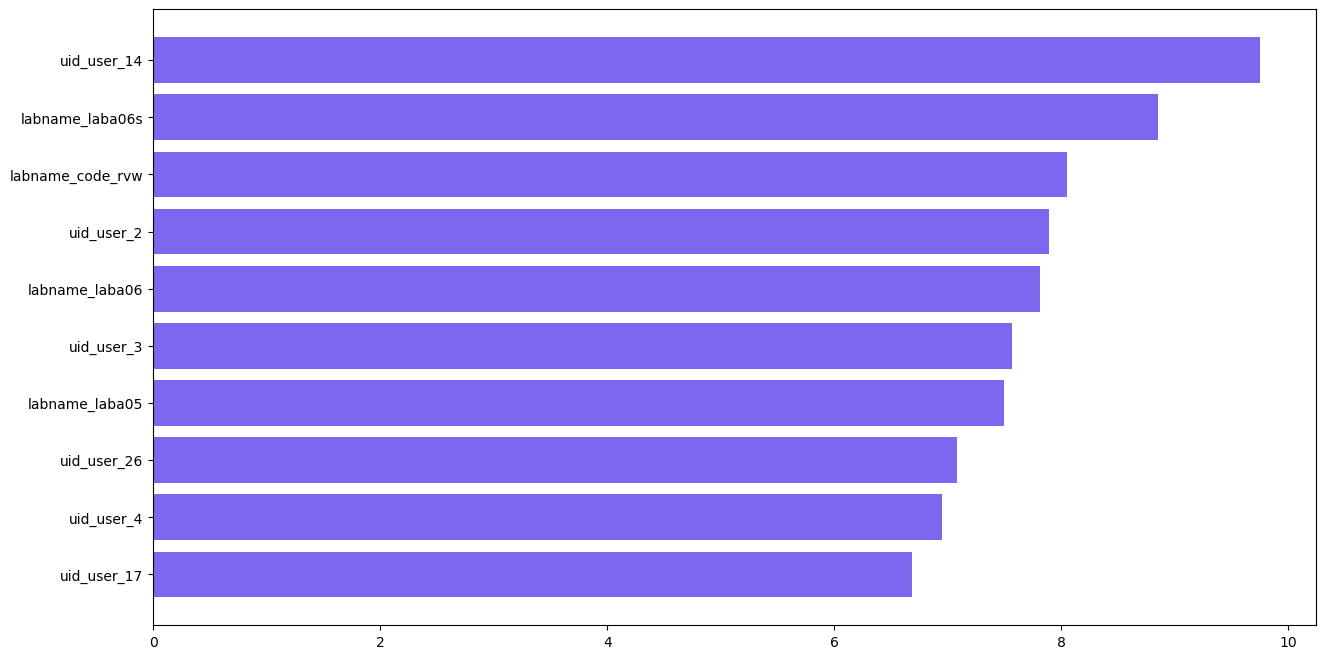

In [271]:
coefs = np.sum(np.abs(lr.coef_), axis=0)
plot_features(coefs, X.columns)

### b. SVC

1. Train a `SVC` model, for the baseline model use parameters `kernel='linear'`, `probability=True`, `random_state=21`. 
2. Try different kernels, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model for the linear kernel *

*By default SVC uses “one vs one” strategy of the classification, thus in `coef_` it returns a matrix. To calculate importance for a feature you need to use [OneVsRestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html) over the SVC and sum all the individual feature importances for all the target values.

In [275]:
svc = SVC(probability=True, random_state=21)
param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
gs = GridSearchCV(svc, param_grid, scoring='accuracy')
gs.fit(X, y)
gs.best_params_

{'kernel': 'poly'}

In [276]:
y_pred = gs.predict(X)
accuracy_score(y, y_pred)

0.8594306049822064

In [277]:
svc = OneVsRestClassifier(SVC(kernel='linear', probability=True, random_state=21)).fit(X, y)
svc.fit(X, y)

OneVsRestClassifier(estimator=SVC(kernel='linear', probability=True,
                                  random_state=21))

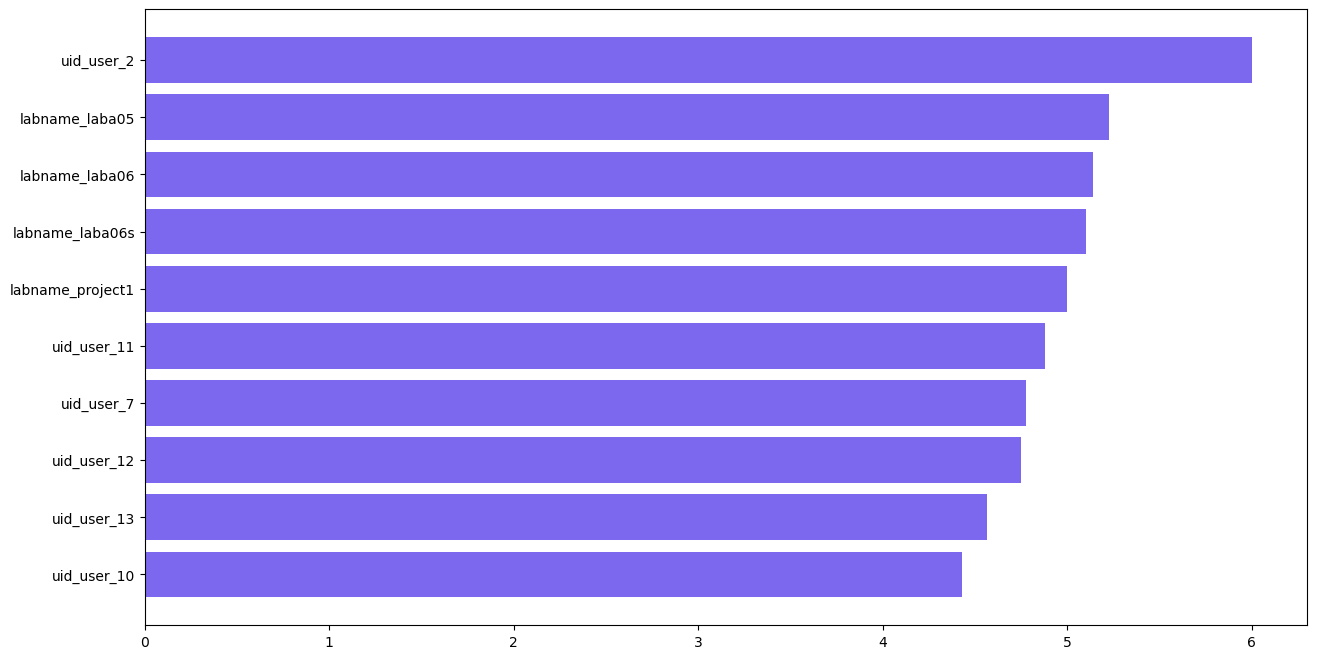

In [281]:
# Извлечение коэффициентов всех моделей
all_coefs = []
for estimator in svc.estimators_:
    all_coefs.append(estimator.coef_)
# Объединяем коэффициенты в одну матрицу
coefs = np.sum(np.abs(np.vstack(all_coefs)), axis=0)
plot_features(coefs, X.columns)

In [283]:
y_pred = svc.predict(X)
accuracy_score(y, y_pred)

0.6126927639383155

- Точность линейного ядра 61%, самое точное poly - 86%.

### c. Decision tree

1. Train a `DecisionTreeClassifier` using for the baseline model `max_depth=4`, `random_state=21`. 
2. Try different values of `max_depth`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [288]:
dtc = DecisionTreeClassifier(random_state=21)
param_grid = {'max_depth': [4]}
gs = GridSearchCV(dtc, param_grid, scoring='accuracy', n_jobs=-1)
gs.fit(X, y)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=21), n_jobs=-1,
             param_grid={'max_depth': [4]}, scoring='accuracy')

In [289]:
gs.best_params_

{'max_depth': 4}

In [290]:
param_grid = {'max_depth': [4, 6, 8, 12, 15, 20, 30, 40]}
gs1 = GridSearchCV(dtc, param_grid, scoring='accuracy', n_jobs=-1)
gs1.fit(X, y)
gs1.best_params_

{'max_depth': 15}

In [294]:
y_pred = gs.predict(X)
accuracy_score(y, y_pred)

0.5516014234875445

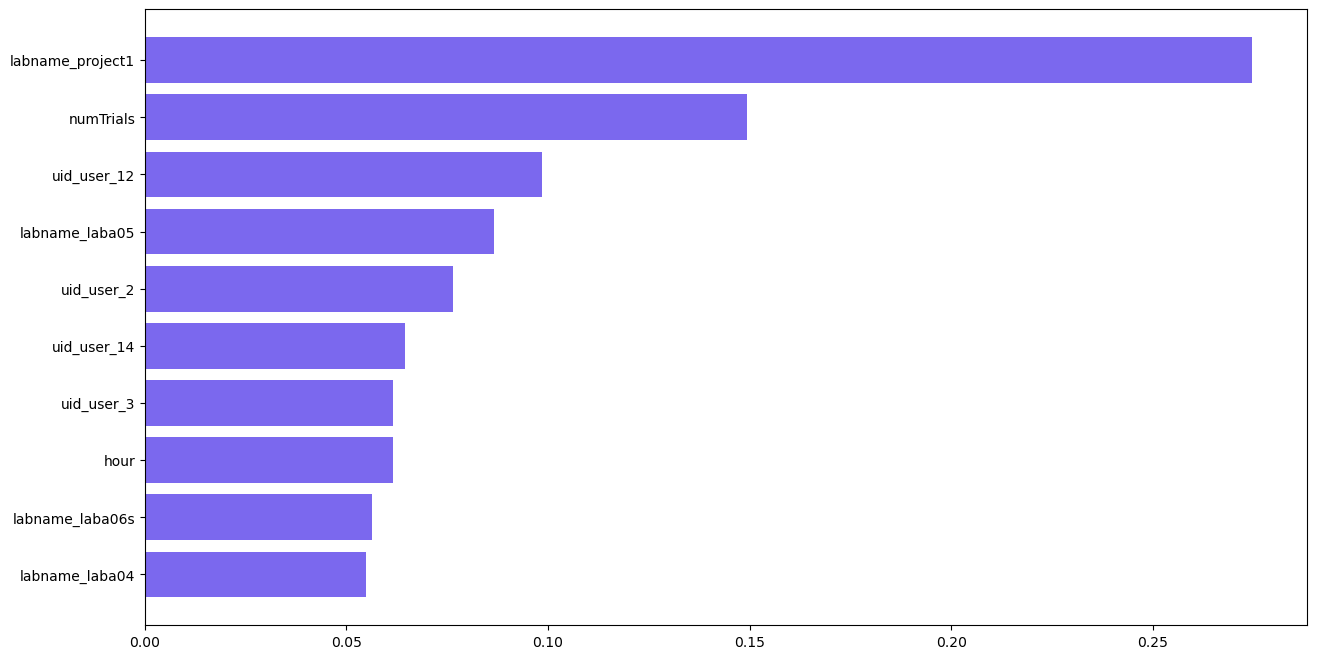

In [296]:
plot_features(gs.best_estimator_.feature_importances_, X.columns)

### d. Random forest

In real life forest is a set of trees. The same thing is with machine learning. Random forest is a set of individual decision trees (check the documentation for more details).

1. Train a `RandomForestClassifier` using for the baseline model parameters `n_estimators=100`, `max_depth = 25`, `random_state=21`. 
2. Try different values of `max_depth` and `n_estimators`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [303]:
rfc = RandomForestClassifier(random_state=21)
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [3, 5, 7, 10, 25]}
gs = GridSearchCV(rfc, param_grid, scoring='accuracy', n_jobs=-1)
gs.fit(X, y)

GridSearchCV(estimator=RandomForestClassifier(random_state=21), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10, 25],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [304]:
gs.best_params_

{'max_depth': 25, 'n_estimators': 100}

In [307]:
y_pred = gs.predict(X)
accuracy_score(y, y_pred)

1.0

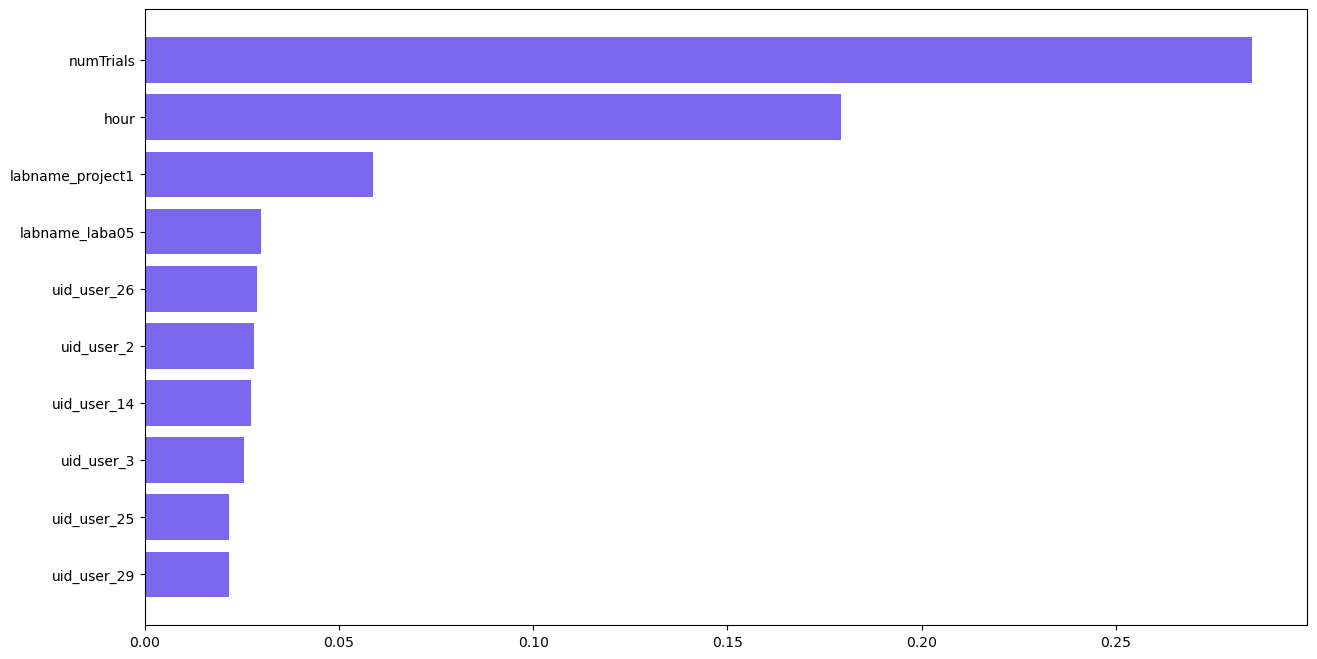

In [309]:
plot_features(gs.best_estimator_.feature_importances_, X.columns)